In [1]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [2]:
data = pd.read_csv("digits.csv")
data.head(n=2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.drop('label', axis=1)
y = data['label']

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
pca = PCA(n_components=2, random_state=27)
X_pca = pca.fit_transform(X_scaled)

In [18]:
# Вычисление доли объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_.sum()

# Вывод результата
print(f"Доля объясненной дисперсии: {explained_variance_ratio:.4f}") 

Доля объясненной дисперсии: 0.0986


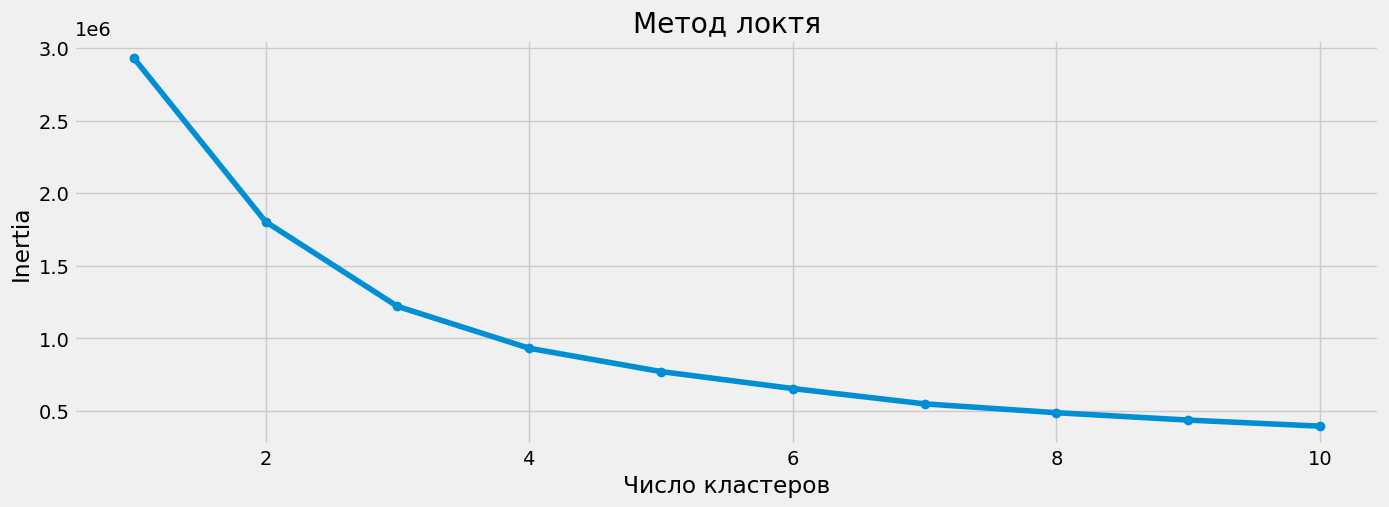

Оптимальное число кластеров (по методу локтя): 4


In [21]:
# Метод локтя для выбора оптимального числа кластеров
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Построение графика "метод локтя"
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia')
plt.show()

# Определение оптимального числа кластеров (визуально по графику)
# В данном случае, оптимальное число кластеров обычно определяется по "излому" графика.
#  Это субъективное решение, которое зависит от конкретного набора данных. 
#  В примере ниже используется предположение, что излом находится около 10.
optimal_n_clusters = 4  # Замените на значение, полученное визуально с графика

print(f"Оптимальное число кластеров (по методу локтя): {optimal_n_clusters}")

In [24]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 1.0 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



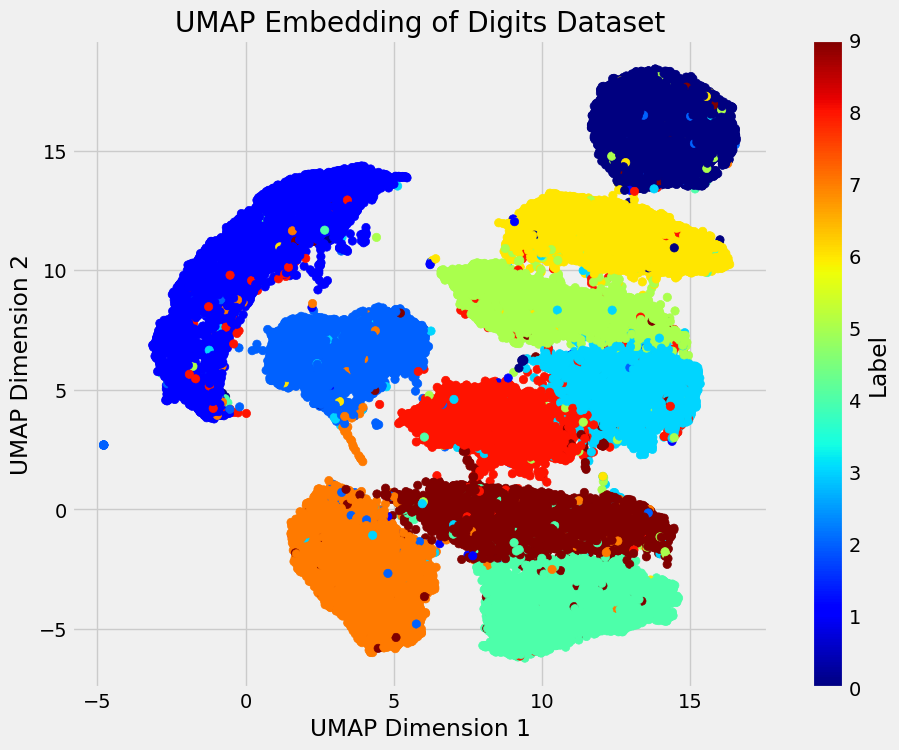

Визуально оцененное количество кластеров: 10


In [25]:
import umap

# Применение UMAP
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation')
embedding = reducer.fit_transform(data)

# Визуализация данных
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='jet')
plt.colorbar(label='Label')
plt.title('UMAP Embedding of Digits Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

# Количество кластеров - визуальная оценка
#  Обратите внимание на график.  Количество четко различимых кластеров -  субъективная оценка.
#  UMAP не выполняет кластеризацию в строгом смысле, а скорее создает низкоразмерное вложение данных,
#  на котором кластеры могут быть видны.  В этом примере, количество кластеров, которое можно  выделить
#   визуально, варьируется от 10 (если считать небольшие скопления в виде кластеров) до меньше (если считать более большие кластеры)
#  Нет однозначного ответа, сколько кластеров,  без применения алгоритмов кластеризации после UMAP.
num_clusters_visual = 10 #  Замените на Вашу оценку по графику

print(f"Визуально оцененное количество кластеров: {num_clusters_visual}")